In [218]:
import pandas as pd

df = pd.read_csv('/content/sample_data/train.csv')

In [219]:
df



,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,TRAIN_391934,JP,QYY1,Container,0.000000,2017-06-06 5:02,Y375615,20.0,27,6820,...,110.0,KEJZ24,"China, People's Republic Of",NaN,NaN,NaN,NaN,14,0.000552,0.000000
391935,TRAIN_391935,SG,GIW5,Bulk,5.884603,2019-10-16 0:36,K635567,10.0,12,3160,...,80.0,JLTM64,Vietnam,-0.66,0.97,27.3,1.253491,8,0.002615,144.061389
391936,TRAIN_391936,US,QGN3,Bulk,70.660241,2021-03-23 22:35,J284147,30.0,8,60300,...,200.0,YERJ68,Singapore,-3.44,7.99,21.1,4.766257,18,0.000155,41.482222
391937,TRAIN_391937,TW,JWI3,Container,9.448179,2015-01-08 7:15,J644215,30.0,29,23800,...,170.0,HCZK58,Comoros,NaN,NaN,NaN,NaN,15,0.000990,7.485278


In [138]:
category_counts = df.iloc[:, 1:].nunique()

print(category_counts)

ARI_CO                    25
ARI_PO                   103
SHIP_TYPE_CATEGORY         4
DIST                  234266
ATA                   336609
ID                     25028
BREADTH                    6
BUILT                     64
DEADWEIGHT              1963
DEPTH                      4
DRAUGHT                    3
GT                      1783
LENGTH                    37
SHIPMANAGER             6566
FLAG                     125
U_WIND                  2633
V_WIND                  2957
AIR_TEMPERATURE          705
BN                     80332
ATA_LT                    24
PORT_SIZE                101
CI_HOUR               178584
dtype: int64


In [220]:
columns_to_drop = ['ARI_CO', 'ID', 'SHIPMANAGER', 'FLAG']
df_1 = df.drop(columns=columns_to_drop)

print(df_1)

           SAMPLE_ID ARI_PO SHIP_TYPE_CATEGORY       DIST               ATA  \
0       TRAIN_000000   GIW5          Container  30.881018  2018-12-17 21:29   
1       TRAIN_000001   UJM2               Bulk   0.000000   2014-09-23 6:59   
2       TRAIN_000002   EUC8          Container   0.000000  2015-02-03 22:00   
3       TRAIN_000003   ZAG4          Container   0.000000   2020-01-17 4:02   
4       TRAIN_000004   GIW5          Container  27.037650   2020-01-26 7:51   
...              ...    ...                ...        ...               ...   
391934  TRAIN_391934   QYY1          Container   0.000000   2017-06-06 5:02   
391935  TRAIN_391935   GIW5               Bulk   5.884603   2019-10-16 0:36   
391936  TRAIN_391936   QGN3               Bulk  70.660241  2021-03-23 22:35   
391937  TRAIN_391937   JWI3          Container   9.448179   2015-01-08 7:15   
391938  TRAIN_391938   JWI3          Container   0.000000  2015-06-08 23:30   

        BREADTH  BUILT  DEADWEIGHT  DEPTH  DRAUGHT 

In [140]:
factor_columns = ['ARI_PO', 'SHIP_TYPE_CATEGORY']
df_1[factor_columns] = df_1[factor_columns].astype('category')

print(df_1.dtypes)

SAMPLE_ID               object
ARI_PO                category
SHIP_TYPE_CATEGORY    category
DIST                   float64
ATA                     object
BREADTH                float64
BUILT                    int64
DEADWEIGHT               int64
DEPTH                  float64
DRAUGHT                float64
GT                       int64
LENGTH                 float64
U_WIND                 float64
V_WIND                 float64
AIR_TEMPERATURE        float64
BN                     float64
ATA_LT                   int64
PORT_SIZE              float64
CI_HOUR                float64
dtype: object


In [221]:
# ATA 열을 날짜형으로 변환합니다.
df_1['ATA'] = pd.to_datetime(df_1['ATA'])

# 연, 월, 일, 시간을 분리합니다.
df_1['Year'] = df_1['ATA'].dt.year
df_1['Month'] = df_1['ATA'].dt.month
df_1['Day'] = df_1['ATA'].dt.day
df_1['Hour'] = df_1['ATA'].dt.hour
df_1['Minute'] = df_1['ATA'].dt.minute

# 필요에 따라 다른 컬럼을 추가하거나 조정할 수 있습니다.

# ATA 열은 더 이상 필요하지 않으므로 삭제합니다.
df_1 = df_1.drop(columns=['ATA'])

print(df_1)

           SAMPLE_ID ARI_PO SHIP_TYPE_CATEGORY       DIST  BREADTH  BUILT  \
0       TRAIN_000000   GIW5          Container  30.881018     30.0     24   
1       TRAIN_000001   UJM2               Bulk   0.000000     30.0     13   
2       TRAIN_000002   EUC8          Container   0.000000     50.0     12   
3       TRAIN_000003   ZAG4          Container   0.000000     20.0     18   
4       TRAIN_000004   GIW5          Container  27.037650     50.0     10   
...              ...    ...                ...        ...      ...    ...   
391934  TRAIN_391934   QYY1          Container   0.000000     20.0     27   
391935  TRAIN_391935   GIW5               Bulk   5.884603     10.0     12   
391936  TRAIN_391936   QGN3               Bulk  70.660241     30.0      8   
391937  TRAIN_391937   JWI3          Container   9.448179     30.0     29   
391938  TRAIN_391938   JWI3          Container   0.000000     30.0     15   

        DEADWEIGHT  DEPTH  DRAUGHT      GT  ...  AIR_TEMPERATURE        BN 

In [222]:
import pandas as pd

# 시간대 팩터를 추가합니다.
def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_1['TimeOfDay'] = df_1['Hour'].apply(classify_time_of_day)

# 필요에 따라 다른 컬럼을 추가하거나 조정할 수 있습니다.

# ATA 열은 더 이상 필요하지 않으므로 삭제합니다.

print(df_1)


           SAMPLE_ID ARI_PO SHIP_TYPE_CATEGORY       DIST  BREADTH  BUILT  \
0       TRAIN_000000   GIW5          Container  30.881018     30.0     24   
1       TRAIN_000001   UJM2               Bulk   0.000000     30.0     13   
2       TRAIN_000002   EUC8          Container   0.000000     50.0     12   
3       TRAIN_000003   ZAG4          Container   0.000000     20.0     18   
4       TRAIN_000004   GIW5          Container  27.037650     50.0     10   
...              ...    ...                ...        ...      ...    ...   
391934  TRAIN_391934   QYY1          Container   0.000000     20.0     27   
391935  TRAIN_391935   GIW5               Bulk   5.884603     10.0     12   
391936  TRAIN_391936   QGN3               Bulk  70.660241     30.0      8   
391937  TRAIN_391937   JWI3          Container   9.448179     30.0     29   
391938  TRAIN_391938   JWI3          Container   0.000000     30.0     15   

        DEADWEIGHT  DEPTH  DRAUGHT      GT  ...        BN  ATA_LT  PORT_SIZ

In [223]:
df_1 = df_1.drop(columns=['Day', 'Hour', 'Minute'])

# Month에 따라 계절 팩터를 추가합니다.
seasons = {
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall'
}
df_1['Season'] = df_1['Month'].map(seasons)

print(df_1)

           SAMPLE_ID ARI_PO SHIP_TYPE_CATEGORY       DIST  BREADTH  BUILT  \
0       TRAIN_000000   GIW5          Container  30.881018     30.0     24   
1       TRAIN_000001   UJM2               Bulk   0.000000     30.0     13   
2       TRAIN_000002   EUC8          Container   0.000000     50.0     12   
3       TRAIN_000003   ZAG4          Container   0.000000     20.0     18   
4       TRAIN_000004   GIW5          Container  27.037650     50.0     10   
...              ...    ...                ...        ...      ...    ...   
391934  TRAIN_391934   QYY1          Container   0.000000     20.0     27   
391935  TRAIN_391935   GIW5               Bulk   5.884603     10.0     12   
391936  TRAIN_391936   QGN3               Bulk  70.660241     30.0      8   
391937  TRAIN_391937   JWI3          Container   9.448179     30.0     29   
391938  TRAIN_391938   JWI3          Container   0.000000     30.0     15   

        DEADWEIGHT  DEPTH  DRAUGHT      GT  ...  V_WIND  AIR_TEMPERATURE  \

In [144]:
missing_values = df_1.isnull().sum()

print(missing_values)

SAMPLE_ID                  0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
U_WIND                163688
V_WIND                163688
AIR_TEMPERATURE       164630
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
Year                       0
Month                      0
TimeOfDay                  0
Season                     0
dtype: int64


In [224]:
columns_to_impute = ['V_WIND', 'AIR_TEMPERATURE', 'BN']

for column in columns_to_impute:
    # 월별 결측치를 해당 월의 평균으로 대체합니다.
    df_1[column] = df_1.groupby('Month')[column].transform(lambda x: x.fillna(x.mean()))

print(df_1)

           SAMPLE_ID ARI_PO SHIP_TYPE_CATEGORY       DIST  BREADTH  BUILT  \
0       TRAIN_000000   GIW5          Container  30.881018     30.0     24   
1       TRAIN_000001   UJM2               Bulk   0.000000     30.0     13   
2       TRAIN_000002   EUC8          Container   0.000000     50.0     12   
3       TRAIN_000003   ZAG4          Container   0.000000     20.0     18   
4       TRAIN_000004   GIW5          Container  27.037650     50.0     10   
...              ...    ...                ...        ...      ...    ...   
391934  TRAIN_391934   QYY1          Container   0.000000     20.0     27   
391935  TRAIN_391935   GIW5               Bulk   5.884603     10.0     12   
391936  TRAIN_391936   QGN3               Bulk  70.660241     30.0      8   
391937  TRAIN_391937   JWI3          Container   9.448179     30.0     29   
391938  TRAIN_391938   JWI3          Container   0.000000     30.0     15   

        DEADWEIGHT  DEPTH  DRAUGHT      GT  ...    V_WIND  AIR_TEMPERATURE 

In [225]:
columns_to_impute = ['U_WIND']

for column in columns_to_impute:
    # 월별 결측치를 해당 월의 평균으로 대체합니다.
    df_1[column] = df_1.groupby('Month')[column].transform(lambda x: x.fillna(x.mean()))

print(df_1)

           SAMPLE_ID ARI_PO SHIP_TYPE_CATEGORY       DIST  BREADTH  BUILT  \
0       TRAIN_000000   GIW5          Container  30.881018     30.0     24   
1       TRAIN_000001   UJM2               Bulk   0.000000     30.0     13   
2       TRAIN_000002   EUC8          Container   0.000000     50.0     12   
3       TRAIN_000003   ZAG4          Container   0.000000     20.0     18   
4       TRAIN_000004   GIW5          Container  27.037650     50.0     10   
...              ...    ...                ...        ...      ...    ...   
391934  TRAIN_391934   QYY1          Container   0.000000     20.0     27   
391935  TRAIN_391935   GIW5               Bulk   5.884603     10.0     12   
391936  TRAIN_391936   QGN3               Bulk  70.660241     30.0      8   
391937  TRAIN_391937   JWI3          Container   9.448179     30.0     29   
391938  TRAIN_391938   JWI3          Container   0.000000     30.0     15   

        DEADWEIGHT  DEPTH  DRAUGHT      GT  ...    V_WIND  AIR_TEMPERATURE 

In [147]:
missing_values = df_1.isnull().sum()

print(missing_values)

SAMPLE_ID             0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
BREADTH               1
BUILT                 0
DEADWEIGHT            0
DEPTH                 1
DRAUGHT               1
GT                    0
LENGTH                1
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
Year                  0
Month                 0
TimeOfDay             0
Season                0
dtype: int64


In [226]:
df_1 = df_1.dropna()

print(df_1)

           SAMPLE_ID ARI_PO SHIP_TYPE_CATEGORY       DIST  BREADTH  BUILT  \
0       TRAIN_000000   GIW5          Container  30.881018     30.0     24   
1       TRAIN_000001   UJM2               Bulk   0.000000     30.0     13   
2       TRAIN_000002   EUC8          Container   0.000000     50.0     12   
3       TRAIN_000003   ZAG4          Container   0.000000     20.0     18   
4       TRAIN_000004   GIW5          Container  27.037650     50.0     10   
...              ...    ...                ...        ...      ...    ...   
391934  TRAIN_391934   QYY1          Container   0.000000     20.0     27   
391935  TRAIN_391935   GIW5               Bulk   5.884603     10.0     12   
391936  TRAIN_391936   QGN3               Bulk  70.660241     30.0      8   
391937  TRAIN_391937   JWI3          Container   9.448179     30.0     29   
391938  TRAIN_391938   JWI3          Container   0.000000     30.0     15   

        DEADWEIGHT  DEPTH  DRAUGHT      GT  ...    V_WIND  AIR_TEMPERATURE 

In [149]:
missing_values = df_1.isnull().sum()

print(missing_values)
print(df_1.dtypes)

SAMPLE_ID             0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
Year                  0
Month                 0
TimeOfDay             0
Season                0
dtype: int64
SAMPLE_ID               object
ARI_PO                category
SHIP_TYPE_CATEGORY    category
DIST                   float64
BREADTH                float64
BUILT                    int64
DEADWEIGHT               int64
DEPTH                  float64
DRAUGHT                float64
GT                       int64
LENGTH                 float64
U_WIND                 float64
V_WIND                 float64
AIR_TEMPERATURE        float64
BN                     fl

In [227]:
factor_columns = ['TimeOfDay', 'Season']
df_1[factor_columns] = df_1[factor_columns].astype('category')

print(df_1.dtypes)

SAMPLE_ID               object
ARI_PO                  object
SHIP_TYPE_CATEGORY      object
DIST                   float64
BREADTH                float64
BUILT                    int64
DEADWEIGHT               int64
DEPTH                  float64
DRAUGHT                float64
GT                       int64
LENGTH                 float64
U_WIND                 float64
V_WIND                 float64
AIR_TEMPERATURE        float64
BN                     float64
ATA_LT                   int64
PORT_SIZE              float64
CI_HOUR                float64
Year                     int64
Month                    int64
TimeOfDay             category
Season                category
dtype: object


In [228]:
X = df_1.drop('CI_HOUR', axis=1)  # 'CI_HOUR' 열을 제외한 모든 열을 X로 설정
X = X.drop('SAMPLE_ID', axis=1)  # 'CI_HOUR' 열을 제외한 모든 열을 X로 설정
X1 = X


y = df_1['CI_HOUR']  # 'CI_HOUR' 열을 y로 설정
y1 = y

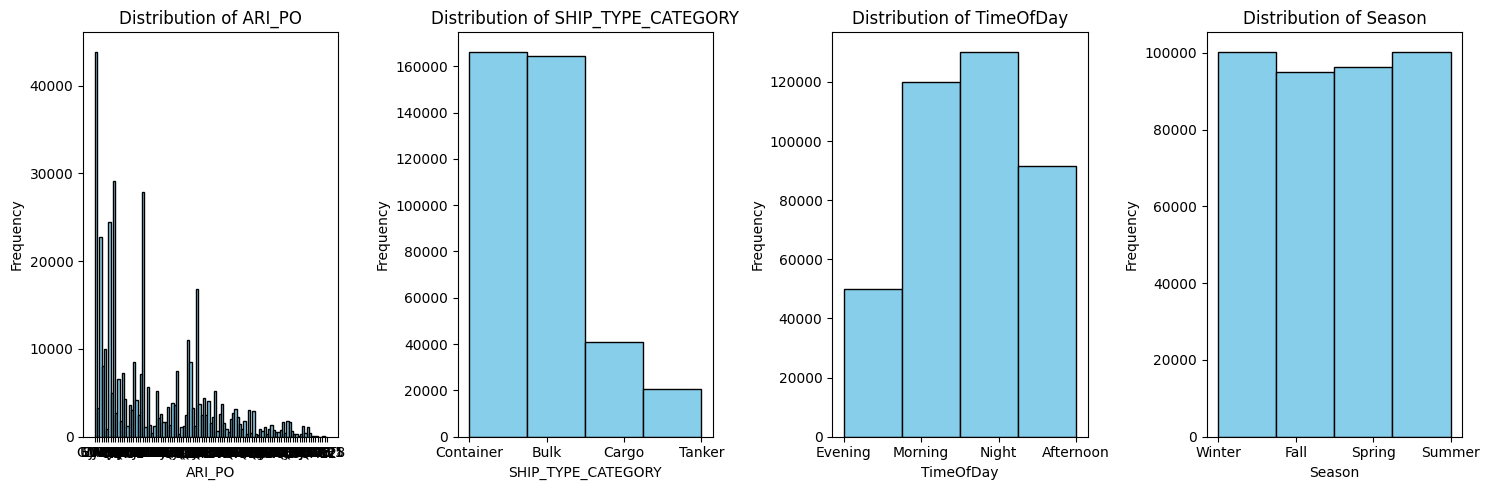

In [152]:
# 카테고리형 변수만 선택
categorical_columns = X.select_dtypes(include=['category']).columns

import matplotlib.pyplot as plt


# 카테고리형 변수의 분포를 시각화
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    axes[i].hist(X[col].dropna(), color='skyblue', edgecolor='black', bins=len(X[col].dropna().unique()))
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

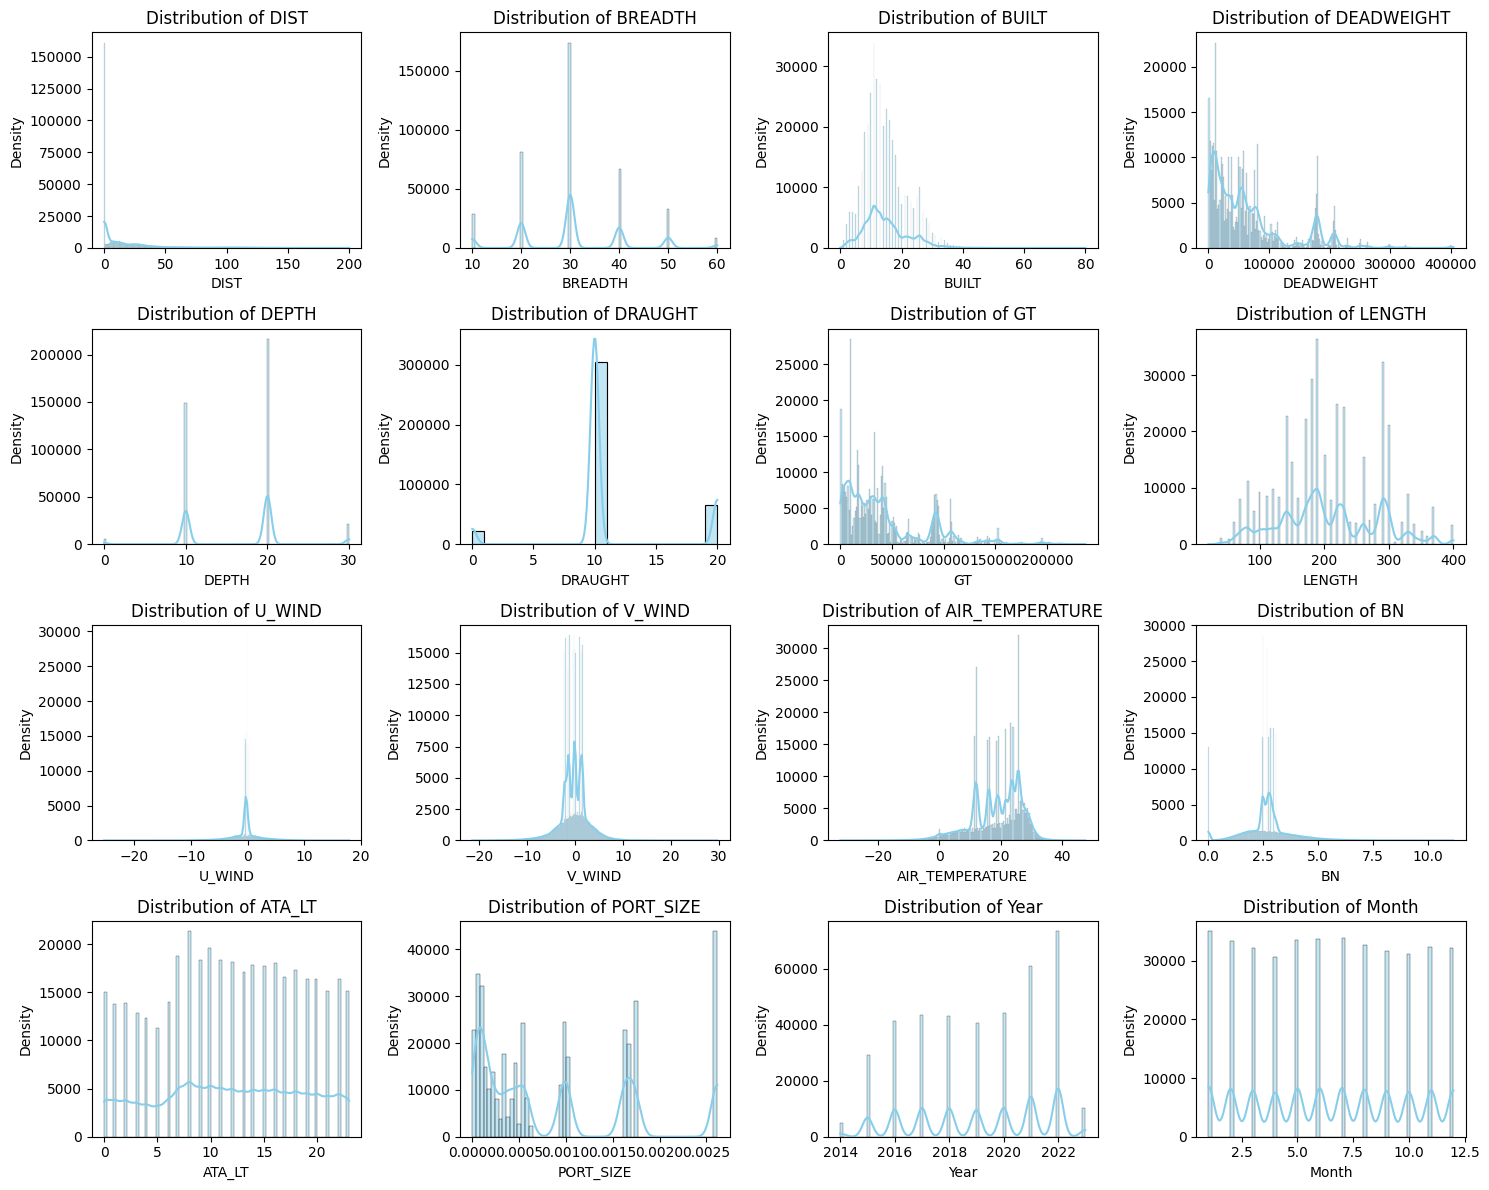

In [153]:
import seaborn as sns

numeric_columns = X.select_dtypes(include=['number']).columns

# 숫자형 변수의 분포를 가우시안 분포 형태로 시각화
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(X[col].dropna(), kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

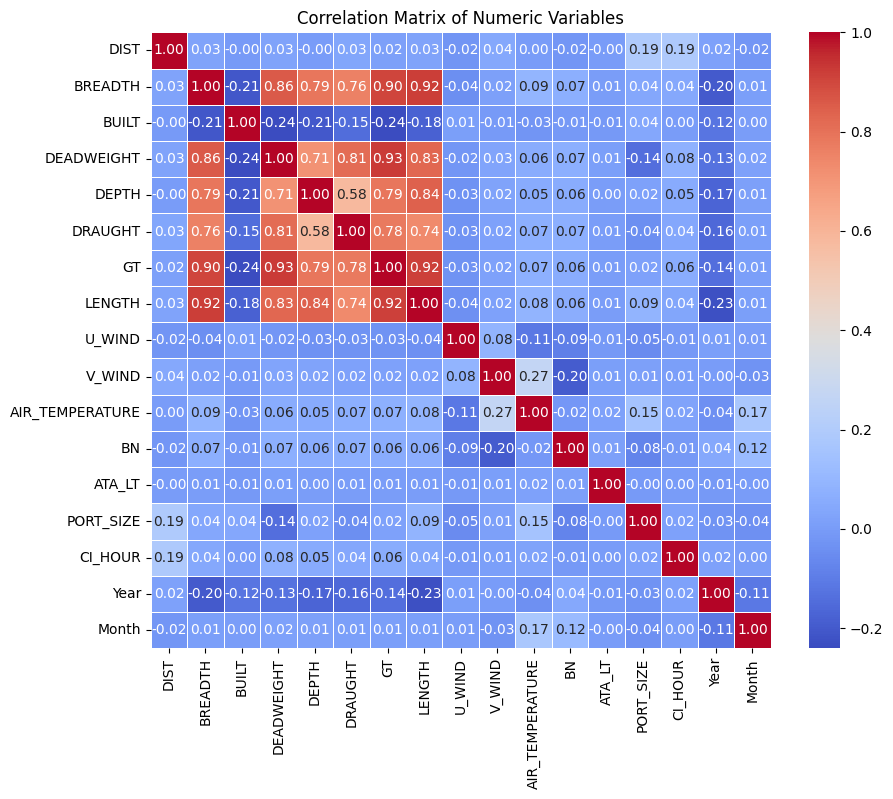

In [154]:
# 숫자형 변수 선택
numeric_columns = df_1.select_dtypes(include=['number']).columns

# 상관관계 표 출력
correlation_matrix = df_1[numeric_columns].corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [239]:
from sklearn.preprocessing import StandardScaler

# 숫자형 변수 선택
numeric_columns = X.select_dtypes(include=['number']).columns

# 표준 스케일링 수행
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# 결과 확인
print(X)

       ARI_PO SHIP_TYPE_CATEGORY      DIST   BREADTH     BUILT  DEADWEIGHT  \
0        GIW5          Container  0.373513 -0.050197  1.313473   -0.618395   
1        UJM2               Bulk -0.624902 -0.050197 -0.248150   -0.435763   
2        EUC8          Container -0.624902  1.775111 -0.390115    1.297674   
3        ZAG4          Container -0.624902 -0.962851  0.461679   -0.892187   
4        GIW5          Container  0.249253  1.775111 -0.674047    0.825348   
...       ...                ...       ...       ...       ...         ...   
391934   QYY1          Container -0.624902 -0.962851  1.739370   -0.893604   
391935   GIW5               Bulk -0.434646 -1.875505 -0.390115   -0.951228   
391936   QGN3               Bulk  1.659616 -0.050197 -0.957978   -0.051604   
391937   JWI3          Container -0.319432 -0.050197  2.023301   -0.626268   
391938   JWI3          Container -0.624902 -0.050197  0.035782   -0.204323   

           DEPTH   DRAUGHT        GT    LENGTH    U_WIND    V_W

In [230]:
X1 = X
y1 = y

In [231]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor


y = df_1['CI_HOUR']  # 'CI_HOUR' 열을 y로 설정

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_features = ['ARI_PO', 'SHIP_TYPE_CATEGORY', 'TimeOfDay', 'Season']  # 'TimeOfDay'와 'Season'에 작은 따옴표 추가


# CatBoost 모델 훈련
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, cat_features=cat_features)
model.fit(X_train, y_train, cat_features=cat_features)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


0:	learn: 170.0603377	total: 313ms	remaining: 5m 12s
1:	learn: 168.8027319	total: 595ms	remaining: 4m 56s
2:	learn: 167.6681595	total: 869ms	remaining: 4m 48s
3:	learn: 166.6325893	total: 1.15s	remaining: 4m 46s
4:	learn: 165.6652835	total: 1.39s	remaining: 4m 36s
5:	learn: 164.7897041	total: 1.71s	remaining: 4m 43s
6:	learn: 163.9978534	total: 2.04s	remaining: 4m 48s
7:	learn: 163.3023290	total: 2.34s	remaining: 4m 50s
8:	learn: 162.6264273	total: 2.52s	remaining: 4m 37s
9:	learn: 161.9770571	total: 2.86s	remaining: 4m 43s
10:	learn: 161.3594180	total: 3.14s	remaining: 4m 42s
11:	learn: 160.8388104	total: 3.37s	remaining: 4m 37s
12:	learn: 160.3220148	total: 3.69s	remaining: 4m 40s
13:	learn: 159.8792668	total: 3.96s	remaining: 4m 38s
14:	learn: 159.4453750	total: 4.26s	remaining: 4m 40s
15:	learn: 159.0152793	total: 4.51s	remaining: 4m 37s
16:	learn: 158.6211361	total: 4.8s	remaining: 4m 37s
17:	learn: 158.3208752	total: 5.05s	remaining: 4m 35s
18:	learn: 157.9946126	total: 5.3s	rema

In [232]:
df = pd.read_csv('/content/sample_data/test.csv')

df

category_counts = df.iloc[:, 1:].nunique()

print(category_counts)

columns_to_drop = ['SAMPLE_ID','ARI_CO', 'ID', 'SHIPMANAGER', 'FLAG']
df_2 = df.drop(columns=columns_to_drop)

print(df_2)

factor_columns = ['ARI_PO', 'SHIP_TYPE_CATEGORY']
df_2[factor_columns] = df_2[factor_columns].astype('category')

print(df_2.dtypes)

# ATA 열을 날짜형으로 변환합니다.
df_2['ATA'] = pd.to_datetime(df_2['ATA'])

# 연, 월, 일, 시간을 분리합니다.
df_2['Year'] = df_2['ATA'].dt.year
df_2['Month'] = df_2['ATA'].dt.month
df_2['Day'] = df_2['ATA'].dt.day
df_2['Hour'] = df_2['ATA'].dt.hour
df_2['Minute'] = df_2['ATA'].dt.minute

# 필요에 따라 다른 컬럼을 추가하거나 조정할 수 있습니다.

# ATA 열은 더 이상 필요하지 않으므로 삭제합니다.
df_2 = df_2.drop(columns=['ATA'])

print(df_2)

import pandas as pd

# 시간대 팩터를 추가합니다.
def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_2['TimeOfDay'] = df_2['Hour'].apply(classify_time_of_day)

# 필요에 따라 다른 컬럼을 추가하거나 조정할 수 있습니다.

# ATA 열은 더 이상 필요하지 않으므로 삭제합니다.

print(df_2)

df_2 = df_2.drop(columns=['Day', 'Hour', 'Minute'])

# Month에 따라 계절 팩터를 추가합니다.
seasons = {
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall'
}
df_2['Season'] = df_2['Month'].map(seasons)

print(df_2)

missing_values = df_2.isnull().sum()

print(missing_values)

columns_to_impute = ['V_WIND', 'AIR_TEMPERATURE', 'BN']

for column in columns_to_impute:
    # 월별 결측치를 해당 월의 평균으로 대체합니다.
    df_2[column] = df_2.groupby('Month')[column].transform(lambda x: x.fillna(x.mean()))

print(df_2)

columns_to_impute = ['U_WIND']

for column in columns_to_impute:
    # 월별 결측치를 해당 월의 평균으로 대체합니다.
    df_2[column] = df_2.groupby('Month')[column].transform(lambda x: x.fillna(x.mean()))

print(df_2)

missing_values = df_2.isnull().sum()

print(missing_values)

df_2 = df_2.dropna()

print(df_2)

missing_values = df_2.isnull().sum()

print(missing_values)
print(df_2.dtypes)

factor_columns = ['TimeOfDay', 'Season']
df_2[factor_columns] = df_2[factor_columns].astype('category')

print(df_2.dtypes)

from sklearn.preprocessing import StandardScaler

# 숫자형 변수 선택
numeric_columns = df_2.select_dtypes(include=['number']).columns

# 표준 스케일링 수행
scaler = StandardScaler()
df_2[numeric_columns] = scaler.fit_transform(df_2[numeric_columns])

# 결과 확인
print(df_2)


ARI_CO                    25
ARI_PO                   103
SHIP_TYPE_CATEGORY         4
DIST                  131906
ATA                   200278
ID                     22802
BREADTH                    7
BUILT                     61
DEADWEIGHT              1934
DEPTH                      4
DRAUGHT                    3
GT                      1738
LENGTH                    37
SHIPMANAGER             6095
FLAG                     118
U_WIND                  2557
V_WIND                  2800
AIR_TEMPERATURE          670
BN                     60462
ATA_LT                    24
PORT_SIZE                101
dtype: int64
       ARI_PO SHIP_TYPE_CATEGORY        DIST               ATA  BREADTH  \
0        GIW5          Container    1.826589  2020-06-18 11:58     50.0   
1        WEY7              Cargo   25.399386  2021-05-26 22:20     10.0   
2        NGG6          Container  111.079467   2019-12-16 0:09     20.0   
3        FFM2               Bulk    9.175258   2015-11-16 5:30     30.0   
4  

In [233]:
y_pred = model.predict(df_2)


In [234]:
y_pred

array([116.23210046,  93.91142971,  41.18495974, ...,  43.23893395,
        61.47210411,  64.97778871])

In [250]:
#데이터 센터

print(X,X1,new_df_train)

       ARI_PO SHIP_TYPE_CATEGORY      DIST   BREADTH     BUILT  DEADWEIGHT  \
0        GIW5          Container  0.373513 -0.050197  1.313473   -0.618395   
1        UJM2               Bulk -0.624902 -0.050197 -0.248150   -0.435763   
2        EUC8          Container -0.624902  1.775111 -0.390115    1.297674   
3        ZAG4          Container -0.624902 -0.962851  0.461679   -0.892187   
4        GIW5          Container  0.249253  1.775111 -0.674047    0.825348   
...       ...                ...       ...       ...       ...         ...   
391934   QYY1          Container -0.624902 -0.962851  1.739370   -0.893604   
391935   GIW5               Bulk -0.434646 -1.875505 -0.390115   -0.951228   
391936   QGN3               Bulk  1.659616 -0.050197 -0.957978   -0.051604   
391937   JWI3          Container -0.319432 -0.050197  2.023301   -0.626268   
391938   JWI3          Container -0.624902 -0.050197  0.035782   -0.204323   

           DEPTH   DRAUGHT        GT    LENGTH    U_WIND    V_W

In [ ]:
import shap

# LightGBM 모델은 이미 훈련된 상태로 가정
# model은 위에서 훈련한 LightGBM 모델입니다.

# SHAP 값 추출
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X)

# 특정 샘플에 대한 SHAP 값 출력
#sample_idx = 0  # 예시로 첫 번째 샘플에 대한 SHAP 값을 출력
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], X.iloc[sample_idx, :])

In [264]:
submission_df = pd.read_csv('/content/sample_data/sample_submission.csv')  # 'sample_submission.csv' 파일 경로에 따라 변경


In [236]:
submission_df.iloc[:, 1] = y_pred

# 수정된 DataFrame을 새로운 CSV 파일로 저장할 수 있습니다.
submission_df.to_csv('new_submission4.csv', index=False)  #

In [246]:
selected_columns = ['BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'ARI_PO','SHIP_TYPE_CATEGORY', 'TimeOfDay', 'Season']#'
new_df_train = X[selected_columns].copy()
new_df_test = df_2[selected_columns].copy()

# 새로운 데이터프레임 확인
print(new_df_train)
print(new_df_test)

         BREADTH     BUILT  DEADWEIGHT     DEPTH   DRAUGHT        GT  \
0      -0.050197  1.313473   -0.618395 -1.071165 -0.236581 -0.627131   
1      -0.050197 -0.248150   -0.435763 -1.071165 -0.236581 -0.454123   
2       1.775111 -0.390115    1.297674  2.236850  1.937667  2.509915   
3      -0.962851  0.461679   -0.892187 -1.071165 -0.236581 -0.914630   
4       1.775111 -0.674047    0.825348  0.582843 -0.236581  1.405715   
...          ...       ...         ...       ...       ...       ...   
391934 -0.962851  1.739370   -0.893604 -1.071165 -0.236581 -0.929387   
391935 -1.875505 -0.390115   -0.951228 -1.071165 -0.236581 -1.011311   
391936 -0.050197 -0.957978   -0.051604  0.582843 -0.236581 -0.166624   
391937 -0.050197  2.023301   -0.626268 -1.071165 -0.236581 -0.622043   
391938 -0.050197  0.035782   -0.204323  0.582843 -0.236581 -0.029235   

          LENGTH ARI_PO SHIP_TYPE_CATEGORY TimeOfDay Season  
0      -0.331094   GIW5          Container         1      3  
1      -0.3

In [251]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor


y = df_1['CI_HOUR']  # 'CI_HOUR' 열을 y로 설정

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_features = ['ARI_PO', 'SHIP_TYPE_CATEGORY', 'TimeOfDay', 'Season']  # 'TimeOfDay'와 'Season'에 작은 따옴표 추가


# CatBoost 모델 훈련
model = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6,cat_features=cat_features)
model.fit(X_train, y_train, cat_features=cat_features)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


0:	learn: 170.0683100	total: 141ms	remaining: 13.9s
1:	learn: 168.8125932	total: 266ms	remaining: 13s
2:	learn: 167.6851981	total: 381ms	remaining: 12.3s
3:	learn: 166.6584225	total: 489ms	remaining: 11.7s
4:	learn: 165.7036115	total: 606ms	remaining: 11.5s
5:	learn: 164.8120908	total: 725ms	remaining: 11.4s
6:	learn: 164.0206867	total: 920ms	remaining: 12.2s
7:	learn: 163.2746893	total: 1.11s	remaining: 12.8s
8:	learn: 162.5916433	total: 1.32s	remaining: 13.3s
9:	learn: 161.9840830	total: 1.56s	remaining: 14s
10:	learn: 161.4244987	total: 1.76s	remaining: 14.2s
11:	learn: 160.9108227	total: 1.97s	remaining: 14.5s
12:	learn: 160.4216001	total: 2.17s	remaining: 14.5s
13:	learn: 159.9874669	total: 2.36s	remaining: 14.5s
14:	learn: 159.5429380	total: 2.58s	remaining: 14.6s
15:	learn: 159.1257400	total: 2.76s	remaining: 14.5s
16:	learn: 158.7229731	total: 2.98s	remaining: 14.5s
17:	learn: 158.4210568	total: 3.14s	remaining: 14.3s
18:	learn: 158.1268422	total: 3.27s	remaining: 13.9s
19:	lea

In [258]:
from sklearn.preprocessing import LabelEncoder

# 범주형 열 식별
categorical_columns = X.select_dtypes(include=['category']).columns

# 레이블 인코딩 수행
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

In [260]:
from sklearn.preprocessing import LabelEncoder

# 범주형 열 식별
categorical_columns = X.select_dtypes(include=['object']).columns

# 레이블 인코딩 수행
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

In [254]:
integer_columns_X = X.select_dtypes(include='int').columns
X[integer_columns_X] = X[integer_columns_X].astype('category')
integer_columns_df_2 = df_2.select_dtypes(include='int').columns
df_2[integer_columns_df_2] = df_2[integer_columns_df_2].astype('category')

In [261]:
X

,ARI_PO,SHIP_TYPE_CATEGORY,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,Year,Month,TimeOfDay,Season
0,21,2,0.373513,-0.050197,1.313473,-0.618395,-1.071165,-0.236581,-0.627131,-0.331094,0.190929,-0.675854,-0.828069,0.347980,-1.029720,2.075830,-0.448599,1.607428,1,3
1,81,0,-0.624902,-0.050197,-0.248150,-0.435763,-1.071165,-0.236581,-0.454123,-0.331094,-0.142622,0.047898,0.553056,0.057985,0.023844,-0.787561,-2.104909,0.739648,2,0
2,14,2,-0.624902,1.775111,-0.390115,1.297674,2.236850,1.937667,2.509915,2.173065,0.001429,-0.375889,-0.810005,-0.034245,-0.879211,0.880664,-1.690832,-1.285174,3,3
3,101,2,-0.624902,-0.962851,0.461679,-0.892187,-1.071165,-0.236581,-0.914630,-1.121880,-1.120478,-0.447922,-1.504467,-0.076378,0.174353,-0.621042,0.379556,-1.574434,3,3
4,21,2,0.249253,1.775111,-0.674047,0.825348,0.582843,-0.236581,1.405715,1.250480,-0.012805,-1.009115,0.829930,-0.201433,0.475371,2.075830,0.379556,-1.574434,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,66,2,-0.624902,-0.962851,1.739370,-0.893604,-1.071165,-0.236581,-0.929387,-1.253678,-0.047660,0.573152,0.627665,-0.196111,0.324862,-0.387542,-0.862677,-0.128133,2,2
391935,21,0,-0.434646,-1.875505,-0.390115,-0.951228,-1.071165,-0.236581,-1.011311,-1.649072,-0.141062,0.419070,1.039903,-1.366205,-0.578193,2.075830,-0.034522,1.028908,3,0
391936,61,0,1.659616,-0.050197,-0.957978,-0.051604,0.582843,-0.236581,-0.166624,-0.067498,-1.221529,2.778095,0.274122,1.926910,0.926899,-0.861056,0.793633,-0.995914,3,1
391937,35,2,-0.319432,-0.050197,2.023301,-0.626268,-1.071165,-0.236581,-0.622043,-0.462891,0.072296,-0.562856,-0.928077,0.112308,0.475371,0.135190,-1.690832,-1.574434,2,3


In [262]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor



# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 훈련
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 100
}

model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train)


sfm = SelectFromModel(model, threshold=0.001)  # threshold 값은 조정 가능
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# 선택된 특성으로 모델 훈련
model_selected = LGBMRegressor(force_col_wise=True)
model_selected.fit(X_train_selected, y_train)


# 테스트 데이터 예측
y_pred_selected = model_selected.predict(X_test_selected)

# 평가
mae_selected = mean_absolute_error(y_test, y_pred_selected)
print(f'Mean Absolute Error (Selected Features): {mae_selected}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 313550, number of used features: 20
[LightGBM] [Info] Start training from score 62.051010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 313550, number of used features: 20
[LightGBM] [Info] Start training from score 62.051010
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 313550, number of used features: 20
[LightGBM] [Info] Start training from score 62.051010
Me

In [213]:
print(X.dtypes)

ARI_PO                category
SHIP_TYPE_CATEGORY    category
DIST                   float64
BREADTH                float64
BUILT                  float64
DEADWEIGHT             float64
DEPTH                  float64
DRAUGHT                float64
GT                     float64
LENGTH                 float64
U_WIND                 float64
V_WIND                 float64
AIR_TEMPERATURE        float64
BN                     float64
ATA_LT                 float64
PORT_SIZE              float64
Year                   float64
Month                  float64
TimeOfDay             category
Season                category
dtype: object


In [266]:
y_pred=model_selected.predict(df_2)

In [268]:
submission_df.iloc[:, 1] = y_pred

# 수정된 DataFrame을 새로운 CSV 파일로 저장할 수 있습니다.
submission_df.to_csv('new_submission5.csv', index=False)  #